# Doing Text Analysis

[Hacker News](https://news.ycombinator.com/) is a popular link sharing site for individuals working in the technology community, particularly technology startups given the sponsoring organization YCombinator funds such ventures. The keyword 'women' is searched in their [newsfeed](https://hnrss.org/newest?q=women&count=500) of the 500 most recent posts with a goal of looking at issues women face in the technology workplace. Of the 500 links 96 articles' texts were returned.

Using the WordNet library synonyms and antonyms keyword lists were generated from a set of themes: harassment, bias, mentor, equity, earnings, and sexism. These keywords were counted among the lemmatized article texts.

When looking at synonyms alone, the theme of 'sexism' was most prevalent in articles at twice the rate of the next most prevalent theme of 'earnings.' Given there are so many synonyms combined with antonyms for the keyword 'earnings' (there are 21), the occurances rate of this theme increases dramatically compared to other keyword lists having few to no additional keywords – 'sexism' has no assigned synonyms or antonyms in the Wordnet library.

On the whole, I expected the issues of sexism, bias, and pay equity to be frequent topics posted to the Hacker News community. It's good to see that this online technology community often associated with 'bro culture' is engaging with this topic. It would be interesting to see if there's been a measurable change in this engagement over the lifetime of the site which according to the WayBack Machine started in 2007.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import requests
from boilerpy3 import extractors

import feedparser as fp

/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
wnl = nltk.WordNetLemmatizer()
nltk.download('stopwords')
en_stop_words = set(nltk.corpus.stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hacker News is a popular link sharing site for individuals working in the technology sexism. The keyword 'women' is searched in their newsfeed of the 200 most recent posts with a goal of looking at issues women face in the technology sexism.

In [4]:
news_feed_links = []
news_news = []

FEED_URL = 'https://hnrss.org/newest?q=women&count=500'
news_feed = fp.parse(FEED_URL)

for item in news_feed.entries:
    news_feed_links.append(item.link)

extractor = extractors.ArticleExtractor()
for page in news_feed_links:
    try:
        # Make request to URL
        resp = requests.get(page)
        news_news.append(extractor.get_content(resp.text))
    except:
        print('Download error: ' + page)

print(len(news_news))


Download error: https://www.scripps.edu/news-and-events/press-room/2022/20221214-lipton-alzheimers.html


Error parsing HTML
Traceback (most recent call last):
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/extractors.py", line 108, in parse_doc
    bp_parser.feed(input_str)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 658, in feed
    self.end_document()
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 461, in end_document
    self.flush_block()
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 540, in flush_block
    if self.last_start_tag.lower() == "title":
AttributeError: 'NoneType' object has no attribute 'lower'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/extractors.py", line 114, in parse_doc
    bp_parser.feed(input_str)
  File "/Users/michaelsmith/opt/anaconda3/lib

Download error: https://www.theregister.com/2022/10/04/infosys_recruiter_lawsuit/


Error parsing HTML
Traceback (most recent call last):
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/extractors.py", line 108, in parse_doc
    bp_parser.feed(input_str)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 657, in feed
    HTMLParser.feed(self, data)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/html/parser.py", line 110, in feed
    self.goahead(0)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/html/parser.py", line 172, in goahead
    k = self.parse_endtag(i)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/html/parser.py", line 420, in parse_endtag
    self.handle_endtag(elem)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 667, in handle_endtag
    self.end_element(tag)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 495, in end_element
    self.label_stacks.pop()
Ind

Download error: https://9to5mac.com/2022/09/27/tim-cook-interview-women-tech-ar-earpods/


Error parsing HTML
Traceback (most recent call last):
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/extractors.py", line 108, in parse_doc
    bp_parser.feed(input_str)
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 658, in feed
    self.end_document()
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 461, in end_document
    self.flush_block()
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/parser.py", line 540, in flush_block
    if self.last_start_tag.lower() == "title":
AttributeError: 'NoneType' object has no attribute 'lower'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/michaelsmith/opt/anaconda3/lib/python3.9/site-packages/boilerpy3/extractors.py", line 114, in parse_doc
    bp_parser.feed(input_str)
  File "/Users/michaelsmith/opt/anaconda3/lib

Download error: https://retractionwatch.com/2022/09/15/how-journal-editors-kept-questionable-data-about-womens-health-out-of-the-literature-years-before-retractions/
96


In [5]:
len(news_news)

96

In [6]:
data = news_news

In [8]:
sentences = nltk.sent_tokenize(str(data))
tokens = nltk.word_tokenize(str(data))
print(len(sentences))
print(len(tokens))
# print(sentences)
# print(sorted(tokens))

2433
106196


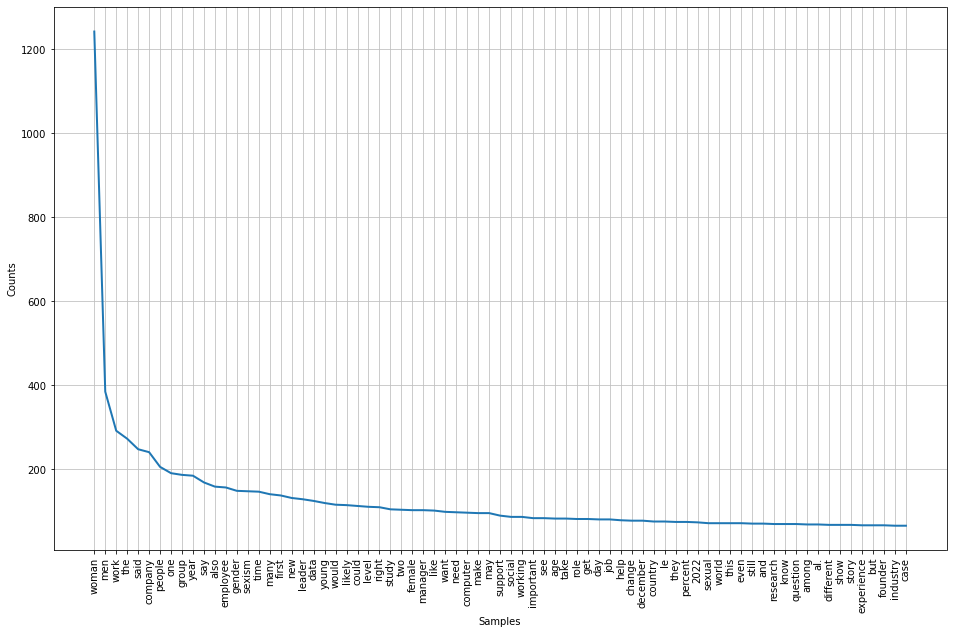

In [19]:
wnl = nltk.WordNetLemmatizer()
tokens2 = [t.lower() for t in tokens if len(t) > 2 and t not in en_stop_words] # Create a new list of words in the tweets by excluding the small words, which tend to be function words
lemma = [wnl.lemmatize(t) for t in tokens2]
words = lemma
words_lemma_freq = nltk.FreqDist(words)
plt.figure(figsize=(16,10))
words_lemma_freq.plot(75, cumulative=False)
plt.show()

Develop a set of keywords that reflect what you expect would be interesting content to code for in the news feed you identify.

In [11]:
from nltk.corpus import wordnet as wn


Wordnet synonym counts

In [27]:

data_keywords = set(['harassment', 'bias', 'mentor', 'equity', 'earnings', 'sexism'])
data_labels = list(data_keywords)
keywords = {}

for term in data_keywords:
    for synset in wn.synsets(term):
        keywords[term] = synset.lemma_names()

keywords_keys = list(keywords.keys())
keyword_counts = {}

def wn_keyword_count(words):
    for key in keywords_keys:
        keyword_counts[key] = 0
    
    for word in words:
        for key in keywords_keys:
            for term in keywords[key]:
                if word.find(term) != -1:
                    keyword_counts[key] += 1

    return keyword_counts       

print(wn_keyword_count(words))

{'earnings': 78, 'bias': 36, 'harassment': 42, 'sexism': 157, 'equity': 38, 'mentor': 16}


Wordnet synonyms + antonyms count

In [29]:
data_keywords = set(['harassment', 'bias', 'mentor', 'equity', 'earnings', 'sexism'])
data_labels = list(data_keywords)

harassment_synonyms = []
harassment_antonyms = []

for syn in wn.synsets('harassment'):
    for l in syn.lemmas():
        harassment_synonyms.append(l.name())
        if l.antonyms():
            harassment_antonyms.append(l.antonyms()[0].name())

if len(harassment_synonyms) > 0:
    if len(harassment_antonyms) > 0:
        harassment_terms = harassment_synonyms + harassment_antonyms
    elif len(harassment_antonyms) == 0: 
        harassment_terms = harassment_synonyms
else: harassment_terms = ['harassment']

bias_synonyms = []
bias_antonyms = []

for syn in wn.synsets('bias'):
    for l in syn.lemmas():
        bias_synonyms.append(l.name())
        if l.antonyms():
            bias_antonyms.append(l.antonyms()[0].name())

if len(bias_synonyms) > 0:
    if len(bias_antonyms) > 0:
        bias_terms = bias_synonyms + bias_antonyms
    elif len(bias_antonyms) == 0: 
        bias_terms = bias_synonyms
else: bias_terms = ['bias']

mentor_synonyms = []
mentor_antonyms = []

for syn in wn.synsets('mentor'):
    for l in syn.lemmas():
        mentor_synonyms.append(l.name())
        if l.antonyms():
            mentor_antonyms.append(l.antonyms()[0].name())

if len(mentor_synonyms) > 0:
    if len(mentor_antonyms) > 0:
        mentor_terms = mentor_synonyms + mentor_antonyms
    elif len(mentor_antonyms) == 0: 
        mentor_terms = mentor_synonyms
else: mentor_terms = ['mentor']

equity_synonyms = []
equity_antonyms = []

for syn in wn.synsets('equity'):
    for l in syn.lemmas():
        equity_synonyms.append(l.name())
        if l.antonyms():
            equity_antonyms.append(l.antonyms()[0].name())

if len(equity_synonyms) > 0:
    if len(equity_antonyms) > 0:
        equity_terms = equity_synonyms + equity_antonyms
    elif len(equity_antonyms) == 0: 
        equity_terms = equity_synonyms
else: equity_terms = ['equity']

earnings_synonyms = []
earnings_antonyms = []

for syn in wn.synsets('earnings'):
    for l in syn.lemmas():
        earnings_synonyms.append(l.name())
        if l.antonyms():
            earnings_antonyms.append(l.antonyms()[0].name())

if len(earnings_synonyms) > 0:
    if len(earnings_antonyms) > 0:
        earnings_terms = earnings_synonyms + earnings_antonyms
    elif len(earnings_antonyms) == 0: 
        earnings_terms = earnings_synonyms
else: earnings_terms = ['earnings']

sexism_synonyms = []
sexism_antonyms = []

for syn in wn.synsets('sexism'):
    for l in syn.lemmas():
        sexism_synonyms.append(l.name())
        if l.antonyms():
            sexism_antonyms.append(l.antonyms()[0].name())

if len(sexism_synonyms) > 0:
    if len(sexism_antonyms) > 0:
        sexism_terms = sexism_synonyms + sexism_antonyms
    elif len(sexism_antonyms) == 0: 
        sexism_terms = sexism_synonyms
else: sexism_terms = ['sexism']

harassment_terms = set(harassment_terms)
bias_terms = set(bias_terms)
mentor_terms = set(mentor_terms)
equity_terms = set(equity_terms)
earnings_terms = set(earnings_terms)
sexism_terms = set(sexism_terms)

print(harassment_terms)
print(bias_terms)
print(mentor_terms)
print(equity_terms)
print(earnings_terms)
print(sexism_terms)

def wn_keyword_count2(words):
    harassment_freq = bias_freq = mentor_freq = equity_freq = earnings_freq = sexism_freq = 0

    for word in words:
        for term in harassment_terms:
            if word.find(term) != -1:
                harassment_freq += 1

        for term in bias_terms:
            if word.find(term) != -1:
                bias_freq += 1

        for term in mentor_terms:
            if word.find(term) != -1:
                mentor_freq += 1

        for term in equity_terms:
            if word.find(term) != -1:
                equity_freq += 1

        for term in earnings_terms:
            if word.find(term) != -1:
                earnings_freq += 1

        for term in sexism_terms:
            if word.find(term) != -1:
                sexism_freq += 1

    theme_freqs = [earnings_freq, bias_freq, harassment_freq, sexism_freq, equity_freq, mentor_freq]

    return theme_freqs   
print(wn_keyword_count2(words))     

{'torment', 'harassment', 'molestation'}
{'diagonal', 'preconception', 'bias', 'prejudice', 'predetermine'}
{'wise_man', 'mentor'}
{'inequity', 'fairness', 'unfairness', 'equity'}
{'earnings', 'net', 'bring_in', 'remuneration', 'wage', 'make', 'pay', 'net_profit', 'clear', 'lucre', 'pull_in', 'garner', 'net_income', 'gain', 'salary', 'realise', 'profits', 'profit', 'take_in', 'earn', 'realize'}
{'sexism'}
[475, 50, 42, 157, 46, 16]


In [30]:
print(len(words))
# print(words)

results3 = pd.Series(wn_keyword_count(words), index=data_labels)
results4 = pd.Series(wn_keyword_count2(words), index=data_labels)

print(results3)
print(results4)

54367
earnings       78
bias           36
harassment     42
sexism        157
equity         38
mentor         16
dtype: int64
earnings      475
bias           50
harassment     42
sexism        157
equity         46
mentor         16
dtype: int64


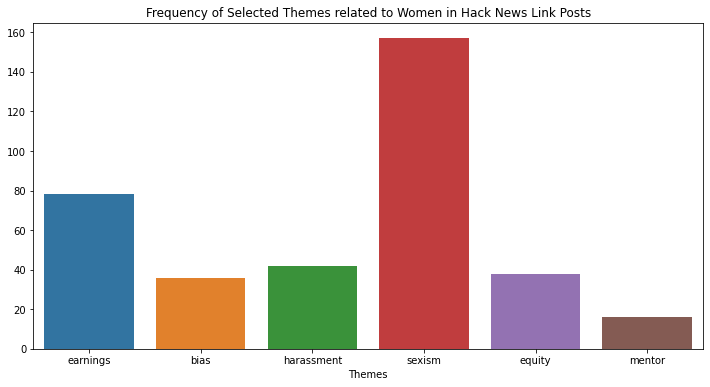

In [32]:
plt.figure(figsize=(12,6)) # These measurements are in inches.
plt.xlabel('Themes')
plt.title('Frequency of Selected Themes (syn) related to Women in Hacker News Articles')
sb.barplot(x=data_labels, y=results3)
plt.show()

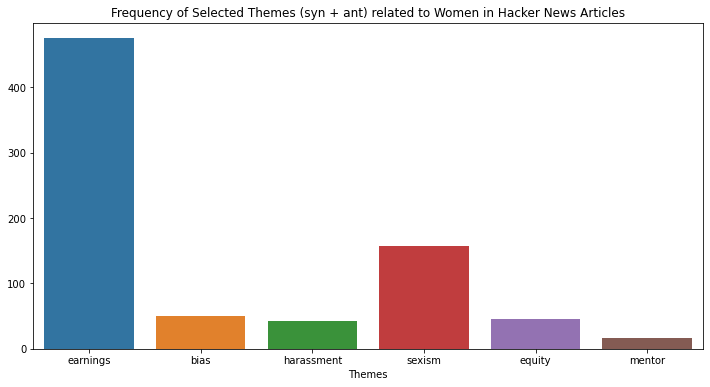

In [33]:
plt.figure(figsize=(12,6)) # These measurements are in inches.
plt.xlabel('Themes')
plt.title('Frequency of Selected Themes (syn + ant) related to Women in Hacker News Articles')
sb.barplot(x=data_labels, y=results4)
plt.show()